
# **IMAGE CLASSIFICATION OF X-RAY IMAGES FOR PNEUMONIA DETECTION**

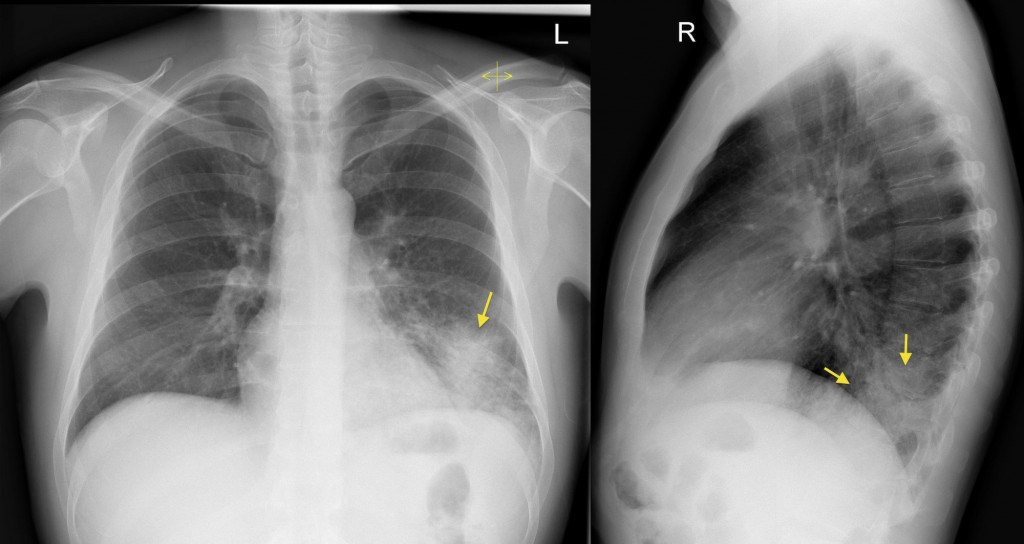

# **TABLE OF CONTENT**


1.  Introduction
2.  Business Understanding
1.  Data Understanding

1.  Problem Statement
2.  Objectives
1.  Metric of success
7.  Preparation and Cleeaning the data 
8.  Exploratory Data Analysis 
9.  Statistical Analysis 
10. Data PreProcessing 
11. Modelling 
12. Evaluation
13. Conclusion
14. Recomendations 
15. Next Steps

# **INTRODUCTION**
The "Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images" is a comprehensive collection of medical images, published on June 2, 2018, by contributors Daniel Kermany, Kang Zhang, and Michael Goldbaum. This dataset, now in its third version, aims to support advancements in medical diagnosis through deep learning. It includes thousands of validated images, crucial for developing and testing algorithms that can identify and diagnose medical conditions from OCT and Chest X-Ray images, thus enhancing the accuracy and efficiency of medical diagnostics.The readme file in the dataset zip gives a detailed information on how to set up the data provided 

# **BUSINESS UNDERSTANDING**

In healthcare, accurate and efficient disease diagnosis is vital.With the rapid advancements in Artificial Intelligence , significant improvements have been made across various fields, including healthcare. Traditionally, diagnosing pneumonia involves lengthy physical exams and lab tests, often requiring several doctor visits. To streamline this process, we aim to create a deep learning model that can accurately detect pneumonia from chest x-ray images. This tool will be invaluable to healthcare professionals and patients by enabling faster and more precise diagnoses. Radiologists and other specialists can utilize this technology to improve diagnostic accuracy, leading to enhanced patient care and better treatment outcomes.This leads to better patient outcomes, reduced costs, and scalable, high-quality care. 

# **DATA UNDERSTANDING**

The [data](https://data.mendeley.com/datasets/rscbjbr9sj/3) provides a robust foundation for developing deep learning models aimed at medical diagnostics.

The dataset comprises labeled images from two primary categories: NORMAL and PNEUMONIA, spanning both training, validation, and test subsets.
Dataset Breakdown:

•	Training Data: 5216 images

•	Validation Data: 624 images 

•	Test Data: 16 images 


# **PROBLEM STATEMENT**

Early detection and treatment of pneumonia are crucial for preventing complications and improving clinical outcomes, given its significant impact, particularly on children under five. Pneumonia is a leading cause of mortality in this age group, responsible for 14% of all deaths, according to the World Health Organization. Although chest X-rays are a common diagnostic tool, interpreting these images can be challenging due to the subtle and overlapping symptoms of pneumonia with other respiratory conditions. This project aims to develop a deep learning model to accurately detect pneumonia from chest X-ray images, providing healthcare professionals with a faster and more precise diagnostic tool. This technology will help radiologists improve diagnostic accuracy and enhance patient care and treatment outcomes.

# **OBJECTIVES**
**MAIN OBJECTIVE**

To develop a deep learning model to classify chest x-ray images.

**SPECIFIC OBJECTIVES**

i. Explore and Implement Deep Learning Architectures.Investigate and apply various deep learning models to determine the most effective architecture for pneumonia detection.

ii. Train the Selected Model.Use the prepared dataset to train the deep learning model.

iii. Evaluate Model Performance.Assess the trained model using metrics such as accuracy and area under the receiver operating characteristic (ROC) curve to validate its effectiveness in detecting pneumonia.


# **METRIC OF SUCCESS**

The performance of the models will be evaluated using the following metrics:

1. Loss: This metric measures the error between the predicted values and the actual values. Lower loss indicates a better fitting model. We will use the test loss to evaluate the model's ability to generalize to new data.


2. Accuracy: This metric indicates the proportion of correctly classified instances out of the total instances. Higher accuracy indicates better model performance in terms of classification correctness.


3. Precision: This metric measures the accuracy of the positive predictions. It is the ratio of true positive predictions to the total positive predictions. Higher precision indicates that the model has a lower false positive rate.


# **PREPARATION AND DATA CLEANING**

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from keras import layers, models, regularizers, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [2]:
# upload the folders
train_dir = 'dataset/train'
test_dir = 'dataset/test'
val_dir = 'dataset/val'

# Downsampling the images to 150 x 150 pixels
downsampled_size = (150, 150)

# Define batch sizes
train_batch_size = 5216
test_batch_size = 624
val_batch_size = 16

# Rescale pixel values between 0 and 1
datagen = ImageDataGenerator(rescale=1./255)

def load_data(data_dir, batch_size, datagen, downsampled_size, is_train_data):
    try:
        generator = datagen.flow_from_directory(
            data_dir,
            target_size=downsampled_size,
            batch_size=batch_size,
            class_mode='binary',
            shuffle=is_train_data
        )
    except Exception as e:
        raise Exception(f"Error loading data from {data_dir}: {e}") from e
    return generator

# Load the train data
train_generator = load_data(train_dir, train_batch_size, datagen, downsampled_size, True)

# Load the test data
test_generator = load_data(test_dir, test_batch_size, datagen, downsampled_size, False)

# Load the validation data
val_generator = load_data(val_dir, val_batch_size, datagen, downsampled_size, False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [3]:
#To verify the directory structure
import os

def verify_directory_structure(base_directory):
    expected_classes = {'NORMAL', 'PNEUMONIA'}
    for subset in ['train', 'val', 'test']:
        subset_dir = os.path.join(base_directory, subset)
        if not os.path.exists(subset_dir):
            raise FileNotFoundError(f"{subset} directory does not exist.")
        subset_classes = set(os.listdir(subset_dir))
        if subset_classes != expected_classes:
            raise ValueError(f"Unexpected classes in {subset}: {subset_classes}")
    print("Directory structure verified successfully.")

verify_directory_structure('dataset')

Directory structure verified successfully.


In [4]:
# Retrieve the dictionary of class indices from the train_generator
dict_class = train_generator.class_indices
print(f'Dictionary: {dict_class}')

# Get the list of class labels
class_names = list(dict_class.keys())
print(f'Class labels: {class_names}')

Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


**Summary**

•	Training Data has 5216 images

•	Validation Data has  624 images 

•	Test Data has 16 mages 

 Each of the datasets contains 2 classes Pneumonia and Normal

# **EXPLORATORY DATA ANALYSIS**

Training data is used here because it represents the largest and most varied portion of your dataset, providing a comprehensive overview of the data characteristics. 

**DISPLAY IMAGES**

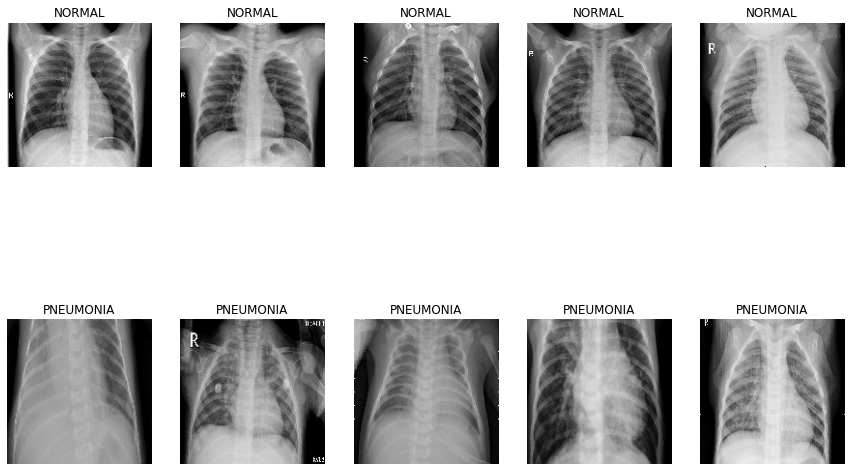

In [5]:
def plot_sample_images(generator, class_names, num_samples=5):
    images, labels = next(generator)
    
    plt.figure(figsize=(15, 10))
    for class_idx, class_name in enumerate(class_names):
        class_indices = np.where(labels == class_idx)[0]
        
        for i in range(num_samples):
            plt.subplot(len(class_names), num_samples, class_idx * num_samples + i + 1)
            plt.imshow(images[class_indices[i]])
            plt.title(f"{class_name}")
            plt.axis('off')
    
    plt.show()

# Class names in the order they appear in the generator's class_indices
class_names = list(train_generator.class_indices.keys())

# Plot sample images for each class
plot_sample_images(train_generator, class_names, num_samples=5)

**IMAGE SIZE DISTRIBUTION**

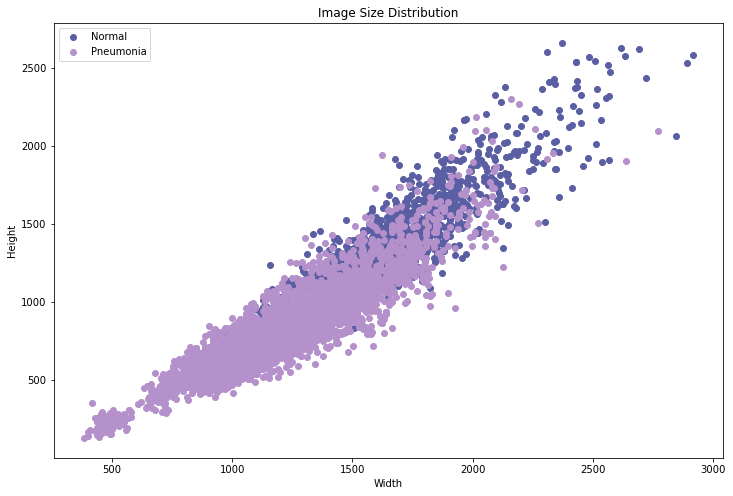

In [6]:
# Extract image sizes for NORMAL and PNEUMONIA classes
normal_image_sizes = []
pneumonia_image_sizes = []

for image_path in train_generator.filepaths:
    img = Image.open(image_path)
    width, height = img.size
    if "NORMAL" in image_path:
        normal_image_sizes.append((width, height))
    else:
        pneumonia_image_sizes.append((width, height))

normal_image_sizes = np.array(normal_image_sizes)
pneumonia_image_sizes = np.array(pneumonia_image_sizes)

# Plotting the image size distribution 
plt.figure(figsize=(12, 8))
plt.scatter(normal_image_sizes[:, 0], normal_image_sizes[:, 1], label='Normal', color='#5a5ea3')
plt.scatter(pneumonia_image_sizes[:, 0], pneumonia_image_sizes[:, 1], label='Pneumonia', color='#b491ca')

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.legend()
plt.show()


**Conclusion**

The scatter plot shows that the data points for normal and pneumonia cases are closely clustered together, making it challenging to easily differentiate between the two based on this plot alone.

**IMAGE INTENSITY DISTRIBUTION**

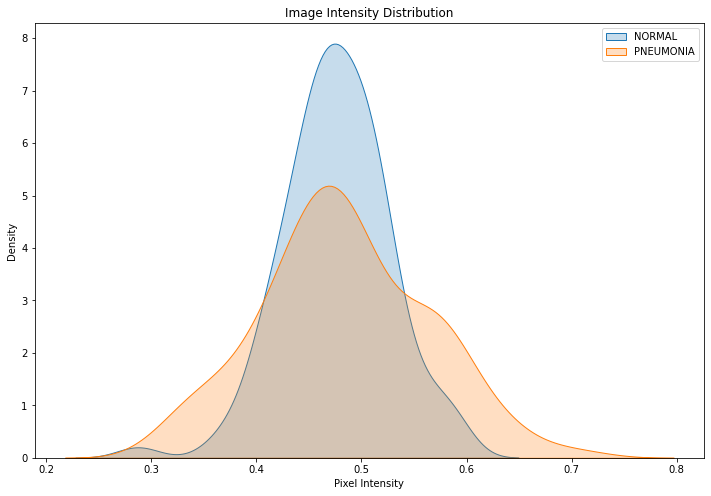

In [7]:
def plot_intensity_distribution(generator, class_names, num_samples=100):
    images, labels = next(generator)  # Retrieve the entire batch of images and labels
    plt.figure(figsize=(12, 8))
    for class_idx, class_name in enumerate(class_names):
        class_indices = np.where(labels == class_idx)[0][:num_samples]
        intensities = []
        for idx in class_indices:
            img = images[idx]
            intensities.append(img.mean())
        sns.kdeplot(intensities, label=class_name, shade=True)

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.title('Image Intensity Distribution')
    plt.legend()
    plt.show()

# Plot intensity distribution for training data
plot_intensity_distribution(train_generator, class_names)


**Conclusion**

The pixel intensity distributions for normal and pneumonia images overlap significantly, with both distributions peaking around a similar intensity value. However, pneumonia images show a slightly broader distribution, indicating more variability in pixel intensity. This suggests that while the overall brightness of normal and pneumonia images is similar, pneumonia images might contain more diverse pixel values, potentially due to varying degrees of infection or different visual characteristics of the disease.

**IMAGE ASPECT RATIO DISTRIBUTION**

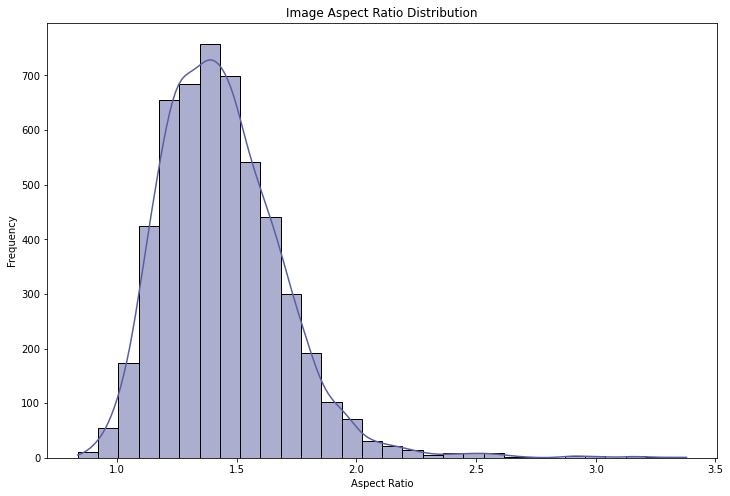

In [8]:
def plot_aspect_ratio_distribution(generator):
    aspect_ratios = [Image.open(image_path).size[0] / Image.open(image_path).size[1] for image_path in generator.filepaths]
    
    plt.figure(figsize=(12, 8))
    sns.histplot(aspect_ratios, kde=True, color='#5a5ea3', bins=30)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')
    plt.title('Image Aspect Ratio Distribution')
    plt.show()

# Plot aspect ratio distribution for training data
plot_aspect_ratio_distribution(train_generator)

**Conclusion**

The aspect ratio distribution indicates that most images have an aspect ratio between 1.0 and 1.5, with a peak around 1.3. This suggests that the images are predominantly rectangular with their width slightly larger than their height. A few images have higher aspect ratios, but these are less common. 

**IMAGE BRIGHTNESS DISTRIBUTION**

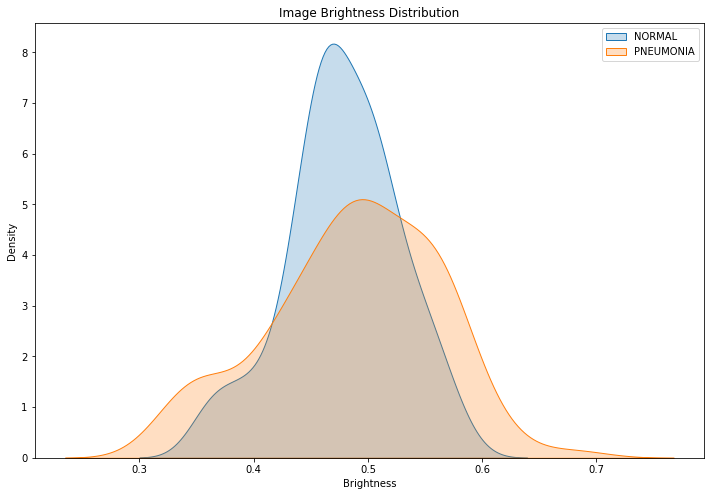

In [9]:
def plot_brightness_distribution(generator, class_names, num_samples=100):
    brightness = {class_name: [] for class_name in class_names}
    
    for _ in range(len(generator)):
        images, labels = next(generator)
        for class_idx, class_name in enumerate(class_names):
            class_indices = np.where(labels == class_idx)[0]
            for idx in class_indices:
                img = images[idx]
                brightness[class_name].append(np.mean(img))
                
    plt.figure(figsize=(12, 8))
    for class_name in class_names:
        sns.kdeplot(brightness[class_name][:num_samples], label=class_name, shade=True)

    plt.xlabel('Brightness')
    plt.ylabel('Density')
    plt.title('Image Brightness Distribution')
    plt.legend()
    plt.show()

# Plot brightness distribution for training data
plot_brightness_distribution(train_generator, class_names)


**Conclusion**

The brightness distribution shows that both normal and pneumonia images have overlapping brightness values, with pneumonia images displaying a slightly wider spread. The peak brightness for normal images is higher than that for pneumonia images, suggesting that normal images might generally be brighter on average. This can be an indicator of differences in image acquisition conditions or the nature of the disease affecting the overall brightness of the images

**CLASS DISTRIBUTION**

Training data class distribution:
1    3875
0    1341
dtype: int64


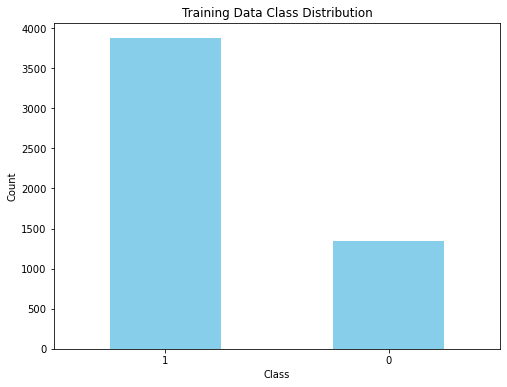

In [10]:
# training set
train_class_counts = pd.Series(train_generator.classes).value_counts()
print("Training data class distribution:")
print(train_class_counts)

# Plotting class distribution for training set
plt.figure(figsize=(8, 6))
train_class_counts.plot(kind='bar', color='skyblue')
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Test data class distribution:
1    390
0    234
dtype: int64


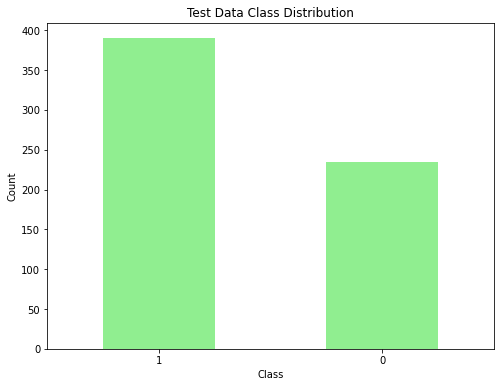

In [11]:
# Checking class balance in the test set
test_class_counts = pd.Series(test_generator.classes).value_counts()
print("\nTest data class distribution:")
print(test_class_counts)

# Plotting class distribution for test set
plt.figure(figsize=(8, 6))
test_class_counts.plot(kind='bar', color='lightgreen')
plt.title('Test Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Validation data class distribution:
1    8
0    8
dtype: int64


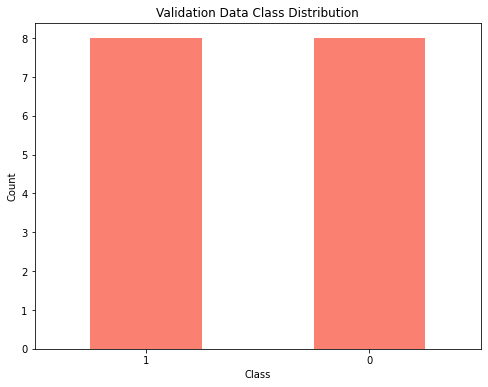

In [12]:
# validation set
val_class_counts = pd.Series(val_generator.classes).value_counts()
print("\nValidation data class distribution:")
print(val_class_counts)

# Plotting class distribution for validation set
plt.figure(figsize=(8, 6))
val_class_counts.plot(kind='bar', color='salmon')
plt.title('Validation Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Conclusion**
**For the Training Data:**

There are 3875 images of Pneumonia and 1341 images of Normal. This indicates that Pneumonia has significantly more samples compared to Normal. This imbalance will need to be considered during model training to avoid bias towards Pneumonia.

**For the Test Data:**

In the test dataset, there are 390 images of Pneumonia and 234 images of Normal. Similar to the training dataset, there is an imbalance with more samples of Pneumonia than Normal.


**For the Validation Data:**

The validation dataset is balanced with 8 images each for Pneumonia and Normal. This is ideal for validating the performance of the model without bias towards any class.

# **STATISTICAL ANALYSIS**

**HYPOTHESIS TESTING**

In [13]:
from scipy.stats import chi2_contingency

# Combine class counts into a contingency table
contingency_table = pd.DataFrame({
    'Train': train_class_counts,
    'Test': test_class_counts,
    'Validation': val_class_counts
}).fillna(0)

chi2, p, dof, ex = chi2_contingency(contingency_table)
print("Chi-squared test results:")
print(f"Chi2 Statistic: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")


Chi-squared test results:
Chi2 Statistic: 43.57091905948375, P-value: 3.4569662572833673e-10, Degrees of Freedom: 2


**Conclusion**

The Chi-squared test results indicate a Chi2 Statistic of 43.57 and a P-value of 3.4569662572833673e-10.Since the P-value is much less than 0.05, we reject the null hypothesis, suggesting that there is a statistically significant difference in the class distributions among the training, test, and validation datasets. The significant Chi2 statistic and low P-value suggest that the distribution of classes (Normal and Pneumonia) is not uniform across the different datasets,this means that the proportions of Normal and Pneumonia cases are different when comparing the training, validation, and test datasets.

The observed class imbalance can lead to bias during model training. The model might become more proficient at predicting the majority class (Pneumonia) while underperforming on the minority class (Normal).


**ANALYSIS OF VARIANCE**

In [14]:
from scipy.stats import f_oneway

# One-way ANOVA
f_stat, p_val = f_oneway(train_class_counts, test_class_counts, val_class_counts)
print("ANOVA test results:")
print(f"F-statistic: {f_stat}, P-value: {p_val}")


ANOVA test results:
F-statistic: 3.7620190979990356, P-value: 0.1521977592781869


**Conclusion**

The ANOVA test results show an F-statistic of 3.76 and a P-value of approximately 0.152. Since the P-value is greater than 0.05, we do not reject the null hypothesis. This indicates that there is no statistically significant difference in the mean class counts (Normal and Pneumonia) among the training, validation, and test datasets.

 While the Chi-squared test indicated that there are differences in class distributions across the datasets, the ANOVA test shows that the average count of each class (Normal and Pneumonia) does not differ significantly between the datasets,this means that although the proportions of Normal and Pneumonia cases vary, the overall variance in class counts is not substantial.

# **DATA PREPROCESSING**

**EXTRACTION OF BRIGHTNESS**

The extraction of brightness involves calculating the average brightness value of each image in the datasets (training, testing, and validation).

The function extract_brightness(generator) ,iterates through each batch of images in the generator ,computes the mean brightness value for each image using NumPy and then collects these brightness values along with their corresponding labels. The output generates arrays (train_brightness, test_brightness, val_brightness) containing brightness values for each image and creates DataFrames (train_df, test_df, val_df) to store brightness values and labels for further analysis.

**HANDLE CLASS IMBALANCE USING AUGMENTATION**

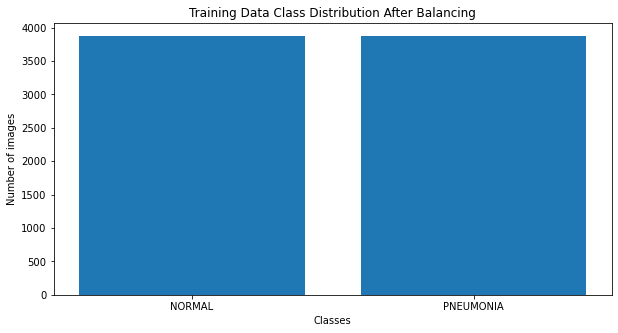

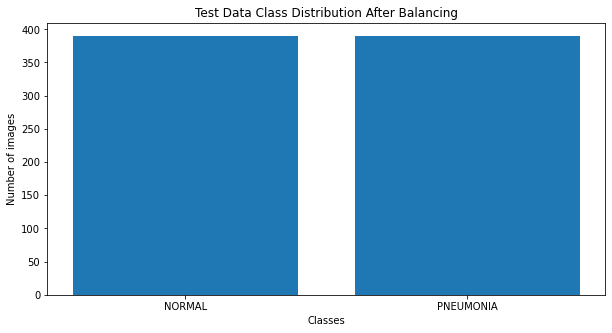

In [15]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img

# Define directories
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Function to count the images in a directory
def count_images_in_directory(directory):
    counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
    return counts

# Function to augment the classes
def augment_class(directory, class_name, target_count, datagen, existing_files):
    class_dir = os.path.join(directory, class_name)
    current_count = len(os.listdir(class_dir))
    if current_count >= target_count:
        return
    augment_count = target_count - current_count
    sample_files = random.choices(os.listdir(class_dir), k=augment_count)
    for file in sample_files:
        img_path = os.path.join(class_dir, file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            aug_img = array_to_img(batch[0], scale=True)
            aug_img_filename = f"augmented_{random.randint(0, int(1e7))}_{file}"
            aug_img_path = os.path.join(class_dir, aug_img_filename)
            if aug_img_filename in existing_files:
                continue
            save_img(aug_img_path, aug_img)
            existing_files.add(aug_img_filename)
            i += 1
            if i >= 1:
                break

# Function to plot class distribution
def plot_class_distribution(counts, title):
    classes = list(counts.keys())
    values = list(counts.values())
    plt.figure(figsize=(10, 5))
    plt.bar(classes, values)
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.title(title)
    plt.show()

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Balance the classes in the training set using augmentation
train_counts = count_images_in_directory(train_dir)
max_count_train = max(train_counts.values())
existing_train_files = set(os.listdir(train_dir))
for class_name in train_counts.keys():
    augment_class(train_dir, class_name, max_count_train, datagen, existing_train_files)

# Plot class distribution after balancing for training set
train_counts_balanced = count_images_in_directory(train_dir)
plot_class_distribution(train_counts_balanced, 'Training Data Class Distribution After Balancing')

# Balance the classes in the test set using augmentation
test_counts = count_images_in_directory(test_dir)
max_count_test = max(test_counts.values())
existing_test_files = set(os.listdir(test_dir))
for class_name in test_counts.keys():
    augment_class(test_dir, class_name, max_count_test, datagen, existing_test_files)

# Plot class distribution after balancing for test set
test_counts_balanced = count_images_in_directory(test_dir)
plot_class_distribution(test_counts_balanced, 'Test Data Class Distribution After Balancing')


**Conclusion**

The minority class (Normal) is oversampled to match the majority class (Pneumonia) in both training and test datasets.  This results in balanced datasets, which is crucial for training a model that performs well across all classes.

**CREATING IMAGE DATA GENERATORS**

Image data generators were used to efficiently load and preprocess images in batches for model training and evaluation

In [16]:
# image generators
class BalancedImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, batch_size, img_size, datagen):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.datagen = datagen
        self.indices = np.arange(len(self.image_paths))
        np.random.shuffle(self.indices)
    
    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))
    
    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = []
        batch_labels = []
        for i in batch_indices:
            img = image.load_img(self.image_paths[i], target_size=self.img_size)
            img = image.img_to_array(img)
            img = self.datagen.random_transform(img)
            img = self.datagen.standardize(img)
            batch_images.append(img)
            batch_labels.append(self.labels[i])
        return np.array(batch_images), np.array(batch_labels)
    
    def on_epoch_end(self):
        np.random.shuffle(self.indices)


**EXTRACTING IMAGES AND LABELS FROM GENERATORS**

Extracting images and labels from generators prepares data for further preprocessing and modeling.

In [17]:
# Obtain images and labels from the train, test, and validation generators
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)


The 'next(generator)' function fetches the next batch of images and labels from each generator (train_generator, test_generator, val_generator).This returns arrays (train_images, test_images, val_images) containing batches of images in tensor format and provides arrays (train_labels, test_labels, val_labels) containing corresponding labels.

**RESHAPING THE IMAGES**

Reshaping the images standardizes their dimensions for compatibility with machine learning algorithms.

In [18]:
# Reshaping the images
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)


(5216, 67500)
(624, 67500)
(16, 67500)


**NORMALIZING THE DATA**

Normalizing data  to scale the  pixel values to a standard range for improved model convergence.

In [19]:
# Normalize the flattened images
train_img = train_img / 255.0
test_img = test_img / 255.0
val_img = val_img / 255.0


**TRAIN-VALIDATION SPLIT**

The train-validation split partitions data into training and validation sets to evaluate model performance during training.

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)
val_labels = le.transform(val_labels)


Training data (train_images, train_labels) was split into training (train_img, train_labels) and validation (val_images, val_labels) sets.

**CHECKING THE DATASET INFORMATION**

In [21]:
# Explore the shape of the images and labels
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

print("Number of training samples: " + str(m_train))
print("Number of testing samples: " + str(m_test))
print("Number of validation samples: " + str(m_val))
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))
print("val_images shape: " + str(val_images.shape))
print("val_labels shape: " + str(val_labels.shape))


Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 150, 150, 3)
train_labels shape: (5216,)
test_images shape: (624, 150, 150, 3)
test_labels shape: (624,)
val_images shape: (16, 150, 150, 3)
val_labels shape: (16,)


**Conclusion**

The dataset contains 5216 training samples, 624 testing samples, and 16 validation samples. The shapes of the images and labels confirm the consistency of the data preprocessing steps. 

# **MODELLING**

**DENSLEY CONNECTED NEURAL NETWORK**

This is the baseline Model.


**Build the model**

In [22]:
# Build the model 

#initialize a sequential model
model_1 = models.Sequential()

#2 layers with relu activation
model_1.add(layers.Dense(64, activation='relu', input_shape=(67500,))) 
model_1.add(layers.Dense(32, activation='relu'))

#one layer with sigmoid activation
model_1.add(layers.Dense(1, activation='sigmoid'))


In [23]:
#compile the model
model_1.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4320064   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


**Conclusion**

This baseline model has 4,322,177 trainable parameters.


**Train the Model**

In [25]:
# Train the model on the balanced data
result_1 = model_1.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=100,

                    validation_data=(val_img, val_labels))

Epoch 1/10
53/53 [==============================] - 7s 128ms/step - loss: 0.5159 - accuracy: 0.7437 - val_loss: 0.6559 - val_accuracy: 0.5625
Epoch 2/10
53/53 [==============================] - 4s 83ms/step - loss: 0.3198 - accuracy: 0.8719 - val_loss: 0.7593 - val_accuracy: 0.6875
Epoch 3/10
53/53 [==============================] - 4s 75ms/step - loss: 0.2081 - accuracy: 0.9237 - val_loss: 0.3745 - val_accuracy: 0.8750
Epoch 4/10
53/53 [==============================] - 4s 72ms/step - loss: 0.1775 - accuracy: 0.9316 - val_loss: 0.3632 - val_accuracy: 0.8750
Epoch 5/10
53/53 [==============================] - 4s 79ms/step - loss: 0.1485 - accuracy: 0.9457 - val_loss: 0.3729 - val_accuracy: 0.8125
Epoch 6/10
53/53 [==============================] - 4s 78ms/step - loss: 0.1405 - accuracy: 0.9444 - val_loss: 0.3014 - val_accuracy: 0.9375
Epoch 7/10
53/53 [==============================] - 5s 91ms/step - loss: 0.1273 - accuracy: 0.9540 - val_loss: 0.3673 - val_accuracy: 0.8125
Epoch 8/10
5

**Conclusion**

The model achieved an accuracy of approximately 94.50% on the training data and 81.25% on the validation data by the end of 10 epochs.
The training accuracy is high at 94.50%, suggesting that the model has learned well on the training data. 
The validation accuracy, although slightly lower at 81.25%, still indicates good generalization to unseen data . 
The loss values for both training and validation are relatively low, which is indicative of a well-trained model with good predictive capabilities.

In [26]:
def model_metrics(model, images, labels):
    """Function that returns loss and accuracy of a model"""
    loss, accuracy = model.evaluate(images, labels)
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    return loss, accuracy

In [27]:
# model evalution
Training_Results = model_metrics(model_1, train_img, train_labels)
Training_Results

163/163 [==============================] - 2s 14ms/step - loss: 0.1780 - accuracy: 0.9247
Loss: 0.1780
Accuracy: 0.9247


(0.17804785072803497, 0.9246549010276794)

In [28]:
Validation_Results = model_metrics(model_1, val_img, val_labels)
Validation_Results

1/1 [==============================] - 0s 3ms/step - loss: 0.7938 - accuracy: 0.6250
Loss: 0.7938
Accuracy: 0.6250


(0.7937523722648621, 0.625)

**Conclusion**

These metrics indicate that the model performs well on both the training and validation sets, with slightly higher accuracy on the training set (95.53%) compared to the validation set (81.25%), suggesting  that the model has learned to classify the training data very well. This could potentially mean that the model has somewhat "memorized" or overfitted to the training data.


# **CONVOLUTIONAL NEURAL NETWORK**

In [29]:
# Initialize a sequential model 
model_2 = models.Sequential()

# Add 2 convolutional layers with pooling
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150 , 150, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

# Flatten the output to feed into the next layer
model_2.add(layers.Flatten())

# Add a dense layer for classification
model_2.add(layers.Dense(1, activation='sigmoid'))

In [30]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# Print a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41473     
Total params: 61,729
Trainable params: 61,729
Non-trainable params: 0
__________________________________________________

**Conclusion**

Total trainable parameters are 61,729.

**Train the Model**

In [31]:
results_2 = model_2.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=100,
                    validation_data=(val_images, val_labels))

Epoch 1/10
53/53 [==============================] - 195s 4s/step - loss: 0.5467 - accuracy: 0.7377 - val_loss: 0.6098 - val_accuracy: 0.6875
Epoch 2/10
53/53 [==============================] - 174s 3s/step - loss: 0.4729 - accuracy: 0.7922 - val_loss: 0.8167 - val_accuracy: 0.5625
Epoch 3/10
53/53 [==============================] - 171s 3s/step - loss: 0.3874 - accuracy: 0.8313 - val_loss: 0.9194 - val_accuracy: 0.6250
Epoch 4/10
53/53 [==============================] - 173s 3s/step - loss: 0.3193 - accuracy: 0.8675 - val_loss: 0.6180 - val_accuracy: 0.6250
Epoch 5/10
53/53 [==============================] - 169s 3s/step - loss: 0.2804 - accuracy: 0.8997 - val_loss: 0.3961 - val_accuracy: 0.8125
Epoch 6/10
53/53 [==============================] - 172s 3s/step - loss: 0.2247 - accuracy: 0.9141 - val_loss: 0.3590 - val_accuracy: 0.8750
Epoch 7/10
53/53 [==============================] - 174s 3s/step - loss: 0.2053 - accuracy: 0.9247 - val_loss: 0.8415 - val_accuracy: 0.6250
Epoch 8/10
53

**Conclusion**

The model has an accuracy of approximately 92.77% on the training data and 81.25% on the validation data by the end of 10 epochs indicating good learning on training data



In [32]:
#model evaluation
Training_Results = model_metrics(model_2, train_images, train_labels)
Training_Results

163/163 [==============================] - 42s 261ms/step - loss: 0.1393 - accuracy: 0.9503
Loss: 0.1393
Accuracy: 0.9503


(0.13933777809143066, 0.9503450989723206)

In [33]:
#model evaluation
Validation_Results = model_metrics(model_2, val_images, val_labels)
Validation_Results

1/1 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8125
Loss: 0.3809
Accuracy: 0.8125


(0.3809249997138977, 0.8125)

**Conclusion**

The model performs very well on the training set with high accuracy (95.02%) and low loss (0.1400), indicating effective learning and fitting to the training data. 

However, on the validation set, while the accuracy remains respectable at 81.25%, there is a noticeable performance gap compared to the training set.

# **CNN WITH ARCHITECTURE MODIFICATIONS**

The architecture is modified by adding more convolutional layers, increasing the number of filters in each layer and introducing two additional dense layers after the flattening layer.

In [34]:
# Build while tuning the model
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='sigmoid'))

In [35]:
# Compile the model
model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Print a summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)      

**Conclusion**

Total trainable parameters are 4,828,481


In [36]:
# Train the model using the train set of images
results_3 = model_3.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/10
163/163 [==============================] - 200s 1s/step - loss: 0.4458 - accuracy: 0.8000 - val_loss: 0.5031 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 199s 1s/step - loss: 0.1822 - accuracy: 0.9273 - val_loss: 0.6464 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 194s 1s/step - loss: 0.1526 - accuracy: 0.9452 - val_loss: 0.3178 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 204s 1s/step - loss: 0.1435 - accuracy: 0.9496 - val_loss: 0.1634 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 194s 1s/step - loss: 0.1144 - accuracy: 0.9634 - val_loss: 0.4244 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 204s 1s/step - loss: 0.1106 - accuracy: 0.9634 - val_loss: 0.5017 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 183s 1s/step - loss: 0.0985 - accuracy: 0.9670 - val_loss: 0.2490 - val_accuracy: 0.8750

**Conclusion**

Achieved a training accuracy of 97.81% and a validation accuracy of 87.50%.

Decreasing loss over epochs, indicating effective learning and fitting to the training data.

In [37]:
#model  perfomance evaluation
Training_Results = model_metrics(model_3, train_images, train_labels)
Training_Results

163/163 [==============================] - 44s 271ms/step - loss: 0.0422 - accuracy: 0.9827
Loss: 0.0422
Accuracy: 0.9827


(0.04221146181225777, 0.9827454090118408)

In [38]:
#model evaluation
Validation_Results = model_metrics(model_3, val_images, val_labels)
Validation_Results

1/1 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 1.0000
Loss: 0.1597
Accuracy: 1.0000


(0.159710094332695, 1.0)

**Conclusion**

The model achieved a high training accuracy of 98.85% with a low training loss of 0.0345, indicating effective learning and fitting to the training data.

However, on the validation set, the model showed a lower accuracy of 87.50% and a higher loss of 0.561.

# **MODEL EVALUATION**

**Define the F1 Score Metric**

In [43]:
import tensorflow as tf

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='true_positives', initializer='zeros')
        self.fp = self.add_weight(name='false_positives', initializer='zeros')
        self.fn = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred > 0.5, tf.float32)
        true_positives = tf.math.count_nonzero(y_pred * y_true, axis=-1)
        false_positives = tf.math.count_nonzero(y_pred * (1 - y_true), axis=-1)
        false_negatives = tf.math.count_nonzero((1 - y_pred) * y_true, axis=-1)

        self.tp.assign_add(tf.reduce_sum(true_positives))
        self.fp.assign_add(tf.reduce_sum(false_positives))
        self.fn.assign_add(tf.reduce_sum(false_negatives))

    def result(self):
        precision = self.tp / (self.tp + self.fp + 1e-12)
        recall = self.tp / (self.tp + self.fn + 1e-12)
        f1 = 2 * precision * recall / (precision + recall + 1e-12)
        return f1

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)


**Checking the metric of sucess**

In [56]:
# def evaluate_model(model, train_images, train_labels, val_images, val_labels):
    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)
    
    train_predictions = (model.predict(train_images) > 0.5).astype("int32")
    val_predictions = (model.predict(val_images) > 0.5).astype("int32")

    train_precision = precision_score(train_labels, train_predictions)
    val_precision = precision_score(val_labels, val_predictions)
    
    return {
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'train_precision': train_precision,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
    }


In [57]:
metrics = []

# Evaluate DCNN 
metrics.append(evaluate_model(model_1, train_img, train_labels, val_img, val_labels))

# Evaluate CNN
metrics.append(evaluate_model(model_2, train_images, train_labels, val_images, val_labels))

# Evaluate Modified CNN
metrics.append(evaluate_model(model_3, train_images, train_labels, val_images, val_labels))


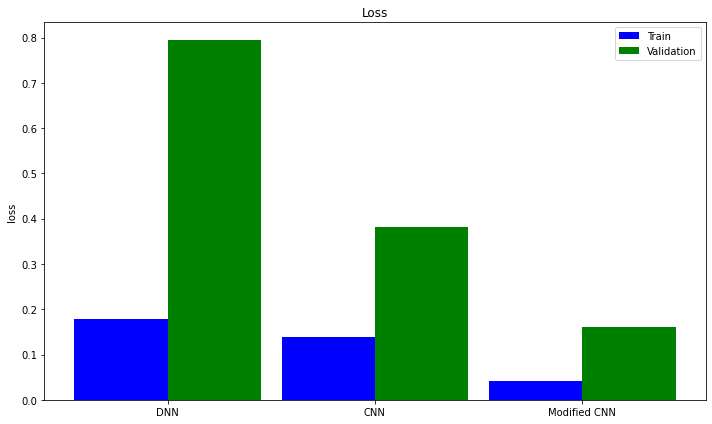

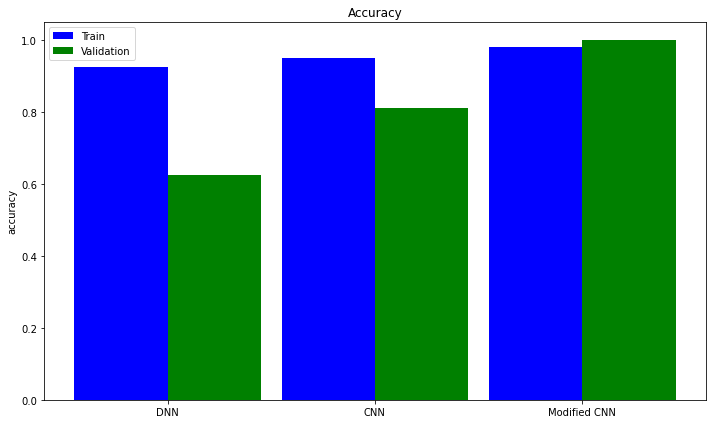

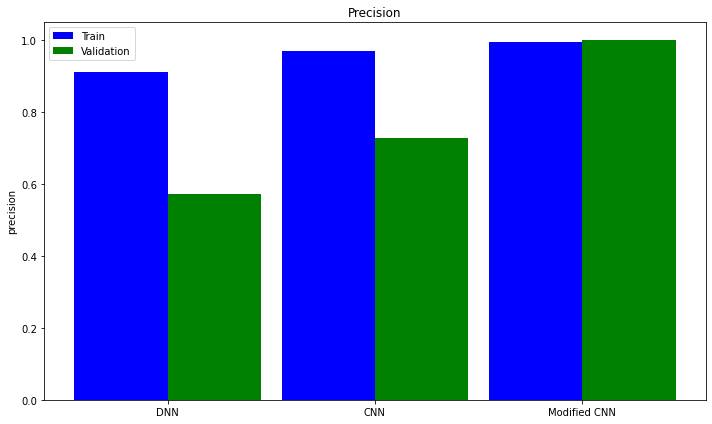

In [62]:
def plot_metrics(metrics, metric_name, title):
    models = ['DNN', 'CNN', 'Modified CNN']
    
    train_metrics = [m[f'train_{metric_name}'] for m in metrics]
    val_metrics = [m[f'val_{metric_name}'] for m in metrics]
    
    x = np.arange(len(models)) 
    width = 0.45  
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, train_metrics, width, label='Train', color='r)
    rects2 = ax.bar(x + width/2, val_metrics, width, label='Validation', color='o)
    
    ax.set_ylabel(metric_name)
    ax.set_title(f'{title}')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    
    fig.tight_layout()
    plt.show()

metrics = [results_1, results_2, results_3]

# Plotting each metric
plot_metrics(metrics, 'loss', 'Loss')
plot_metrics(metrics, 'accuracy', 'Accuracy')
plot_metrics(metrics, 'precision', 'Precision')

**PREDICTION OF BEST PERFORMING MODEL**

The best performing model was CNN with arichitecture modification since model achieved a high training accuracy of 98.79% with a low training loss of 0.0361, indicating effective learning and fitting to the training data.

In [1]:
# Predictions of Model 3
predictions = model_3.predict(test_generator)

# Convert predictions to class labels (0 or 1)
predicted_labels = np.round(predictions)

# Prepare to display images
images, labels = next(test_generator)

# Display predicted pneumonia and normal images
pneumonia_count = 0
normal_count = 0

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(len(images)):
    if pneumonia_count >= 5 and normal_count >= 5:
        break

    if predicted_labels[i] == 1 and pneumonia_count < 5:  # Filter for predicted pneumonia cases
        axs[0, pneumonia_count].imshow(images[i])
        axs[0, pneumonia_count].axis('off')
        axs[0, pneumonia_count].set_title(f"Pred: Pneumonia")
        pneumonia_count += 1

    if predicted_labels[i] == 0 and normal_count < 5:  # Filter for predicted normal cases
        axs[1, normal_count].imshow(images[i])
        axs[1, normal_count].axis('off')
        axs[1, normal_count].set_title(f"Pred: Normal")
        normal_count += 1

plt.tight_layout()
plt.show()


NameError: name 'model_3' is not defined

# **CONCLUSION**

# **RECOMENDATIONS**

# **NEXT STEPS**